## <div style ="font-size:25px; border-radius:25px; border:3666; padding:10px;  background-color:#fffafa; text-align:center; color:#000000;">Convolution Neural Network</div>


<div style="font-size:20px; color:#000000; background-color:#ffffff; padding:25px; ">

<b>Convolutional Neural Network :</b> CNN (Convolutional Neural Network) is primarily used for image and spatial data processing, utilizing convolutional layers to automatically capture features like edges and textures.

<li><b>Convolutional Layers:
</b> These layers apply convolution operations to the input, using filters (kernels) to extract spatial features from the data. They preserve the spatial hierarchy by capturing local patterns.

</li>
<li><b>Activation Functions:
</b> Non-linear functions like ReLU (Rectified Linear Unit) are applied after convolution operations to introduce non-linearity, allowing the network to learn complex patterns.
</li>
<li><b>Pooling Layer :
</b> These layers reduce the spatial dimensions of the feature maps, typically using operations like max pooling or average pooling, which helps to downsample the data and reduce computational complexity while maintaining important features.
</li>
<li><b> Fully Connected Layers:
</b> At the end of the network, fully connected layers connect every neuron in one layer to every neuron in the next, serving to combine features learned by previous layers for final classification or regression.
</li>
<li><b> Dropout Layers:
</b> Used as a regularization technique, dropout layers randomly deactivate a fraction of neurons during training, helping to prevent overfitting.

</li>
<li><b> Loss Function:
</b> A function used to measure the discrepancy between the predicted output and the actual target values, guiding the optimizer in updating the network's weights.




</li>
<li><b>Optimizer :</b>Used as a regularization technique, dropout layers randomly deactivate a fraction of neurons during training, helping to prevent overfitting.
</li>
</div>

<img src = "https://editor.analyticsvidhya.com/uploads/67201cnn.jpeg" height=100% width=100%>

<div style="display:grid; grid-template-columns:repeat(3,3fr); gap:10px;">

<img src="https://editor.analyticsvidhya.com/uploads/11178fil.gif">
<img src="https://i.ibb.co/LSyj00W/nagesh-cnn-intro-8.gif" height=95%>
<img src="https://www.bing.com/th/id/OGC.8b8aedd3b0e052ef58d35a0a424a76c1?pid=1.7&rurl=https%3a%2f%2fquantdare.com%2fwp-content%2fuploads%2f2021%2f05%2fWebp.net-gifmaker.gif&ehk=I0YiWofBeleMV%2fzj7ZBWq%2fAN0GVsYKAUbKxMqGB1YaI%3d">


</div>

In [8]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [9]:
# Load digits dataset
digits = datasets.load_digits()
images = digits.images
labels = digits.target

# Normalize pixel values to be between 0 and 1
images = images / 16.0

# Reshape images to add a channel dimension
images = images.reshape((images.shape[0], 8, 8, 1))

# Binarize the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)


In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


c:\Users\Parthiban\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2558 - loss: 2.2179 - val_accuracy: 0.8417 - val_loss: 1.8456
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8588 - loss: 1.6427 - val_accuracy: 0.8889 - val_loss: 0.9243
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8956 - loss: 0.7707 - val_accuracy: 0.9222 - val_loss: 0.4235
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9213 - loss: 0.3955 - val_accuracy: 0.9333 - val_loss: 0.2622
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9511 - loss: 0.2439 - val_accuracy: 0.9583 - val_loss: 0.1931
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9610 - loss: 0.1792 - val_accuracy: 0.9583 - val_loss: 0.1677
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9704 - loss: 0.1416 - val_accuracy: 0.9639 - val_loss: 0.1356
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9765 - loss: 0.1273 - val_accuracy: 0.9639 - val_loss

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


12/12 - 0s - 9ms/step - accuracy: 0.9694 - loss: 0.0954
Test accuracy: 0.9694444537162781


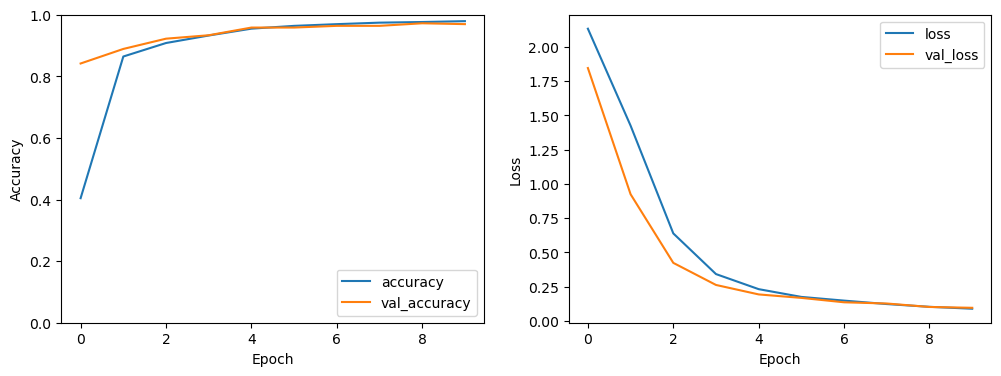

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()
